In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시각화 도구 설정.
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
# 사용할 데이터.
data = {'aa':10,'bb':20,'cc':30,'dd':40,'ee':50}
sr   = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [3]:
# 합.
sr.sum()

150

In [4]:
# 평균.
sr.mean()

30.0

In [5]:
# 표준편차.
sr.std()

15.811388300841896

In [6]:
# 중앙값.
sr.median()

30.0

In [7]:
# 최대값과 최소값.
print(sr.max())
print(sr.min())

50
10


In [8]:
# quantile() : 100분위수.
sr.quantile([0.25, 0.75])

0.25    20.0
0.75    40.0
Name: 국어점수, dtype: float64

In [9]:
# value_counts() : 값의 개수를 출력.
sr.value_counts()

40    1
10    1
20    1
30    1
50    1
Name: 국어점수, dtype: int64

In [10]:
# 가장 큰(작은) 값의 index를 반환.
print(sr.idxmax())
print(sr.idxmin())

ee
aa


In [11]:
# 응용.
# sr[sr<=45].max()
sr[sr[sr <= 45].idxmax()]

40

In [12]:
# head() : 앞에서 부터 지정한 수 만큼.
# tail() : 뒤에서 부터 지정한 수 만큼.
# 디폴트 값 5로 설정.
print(sr.head(2))
print('')
print(sr.tail(4))

aa    10
bb    20
Name: 국어점수, dtype: int64

bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64


In [13]:
# nlargest() : 지정된 수 만큼 큰 값 순으로 표시.
# keep='first' : 동등한 값이 있다면 제일 먼저 나온 값을 표시.
# keep='last' : 동등한 값이 있다면 제일 마지막에 나온 값을 표시.
# keep ='all' :동등한 값을 모두 표시.
sr.nlargest(2)

ee    50
dd    40
Name: 국어점수, dtype: int64

In [14]:
# nsmallest() : 지정된 수 만큼 큰 값 순으로 표시.
# keep='first' : 동등한 값이 있다면 제일 먼저 나온 값을 표시.
# keep='last' : 동등한 값이 있다면 제일 마지막에 나온 값을 표시.
# keep ='all' :동등한 값을 모두 표시.
sr.nsmallest(3)

aa    10
bb    20
cc    30
Name: 국어점수, dtype: int64

In [15]:
# apply() 를 사용하기 위한 함수 생성.
def fn(v):
    print('v=',v)
    print('==========')
    return v+1

In [16]:
# apply(함수) : Series를 함수에 적용시켜줌.
sr.apply(fn)

v= 10
v= 20
v= 30
v= 40
v= 50


aa    11
bb    21
cc    31
dd    41
ee    51
Name: 국어점수, dtype: int64

In [17]:
def fn(v):
#     print('v=',v)
#     print('==========')
#     if v>30:
#         return v+1
#     else:
#         return v+2
    return v + 1 if v > 30 else v+2

In [18]:
sr.apply(fn)

aa    12
bb    22
cc    32
dd    41
ee    51
Name: 국어점수, dtype: int64

In [19]:
# lambda식 표현으로 함수를 대체하여 적용.
sr.apply(lambda v: v + 1 if v > 30 else v + 2)

aa    12
bb    22
cc    32
dd    41
ee    51
Name: 국어점수, dtype: int64

In [20]:
# lambda식 표현으로 함수를 대체하여 적용.
sr.apply(lambda x: '합격' if x >= 40 else '불합격')

aa    불합격
bb    불합격
cc    불합격
dd     합격
ee     합격
Name: 국어점수, dtype: object

In [21]:
# 지정한 n개의 계급으로 분할.
# 9.96 < aa <=18.0
# 8.0< bb <=26.0.....
pd.cut(sr, 5)  

aa    (9.96, 18.0]
bb    (18.0, 26.0]
cc    (26.0, 34.0]
dd    (34.0, 42.0]
ee    (42.0, 50.0]
Name: 국어점수, dtype: category
Categories (5, interval[float64]): [(9.96, 18.0] < (18.0, 26.0] < (26.0, 34.0] < (34.0, 42.0] < (42.0, 50.0]]

In [22]:
# 5계급으로 분할 한 뒤 값의 개수를 구하고 Index를 기준으로 오름차순으로 정렬.
pd.cut(sr, 5).value_counts().sort_index()

(9.96, 18.0]    1
(18.0, 26.0]    1
(26.0, 34.0]    1
(34.0, 42.0]    1
(42.0, 50.0]    1
Name: 국어점수, dtype: int64

In [23]:
# 계급 구간을 직접 설정. 
# range()를 쓰면 손쉽게 설정이 가능.
pd.cut(sr,[0,20,40,60]).value_counts().sort_index()

(0, 20]     2
(20, 40]    2
(40, 60]    1
Name: 국어점수, dtype: int64

In [24]:
# 특정 구간에 따른 값에 대하여 labels를 설정함으로써 문자로 표현이 가능.
pd.cut(sr,[0,20,40,60], labels=['C','B','A'])

aa    C
bb    C
cc    B
dd    B
ee    A
Name: 국어점수, dtype: category
Categories (3, object): ['C' < 'B' < 'A']

In [25]:
# for을 통한 index 값만 추출.
for n in sr.index:
    print(n)

aa
bb
cc
dd
ee


In [26]:
# for문을 통한 값들만 추출.
for n in sr:
    print(n)

10
20
30
40
50


In [27]:
# items() : Series의 Index와 value를 tuple로 반환.
# for문을 통해 튜플로 Index와 value를 둘 다 추출이 가능.
for n in sr.items():
    print(n)

('aa', 10)
('bb', 20)
('cc', 30)
('dd', 40)
('ee', 50)


In [28]:
# 튜플에 떼어서 추출하고자 할 경우, 변수를 지정하여 추출하면 됨.
for idx, v in sr.items():
    print(idx, v)

aa 10
bb 20
cc 30
dd 40
ee 50


In [29]:
# Series 데이터를 csv로 저장.
sr.to_csv('data.csv')

#### 시각화Visualization)
- < Main Option >
    - kind : 시각화 유형 설정.
    - color : 색상 설정.
    - figsize : 표현될 이미지 크기 설정.
    - title : 제목 이름 설정.
    - legend : 범례 여부 설정.(True, False)
    - grid : 격자 여부 설정.(True, False)
    - xlim : x축 값의 범위를 설정.
    - ylim : y축 값의 범위를 설정.
    - rot : 주어진 값만큼 표현되는 변수명을 회전시켜 표시.

- Matplotlib에서 이용 가능한 색상.

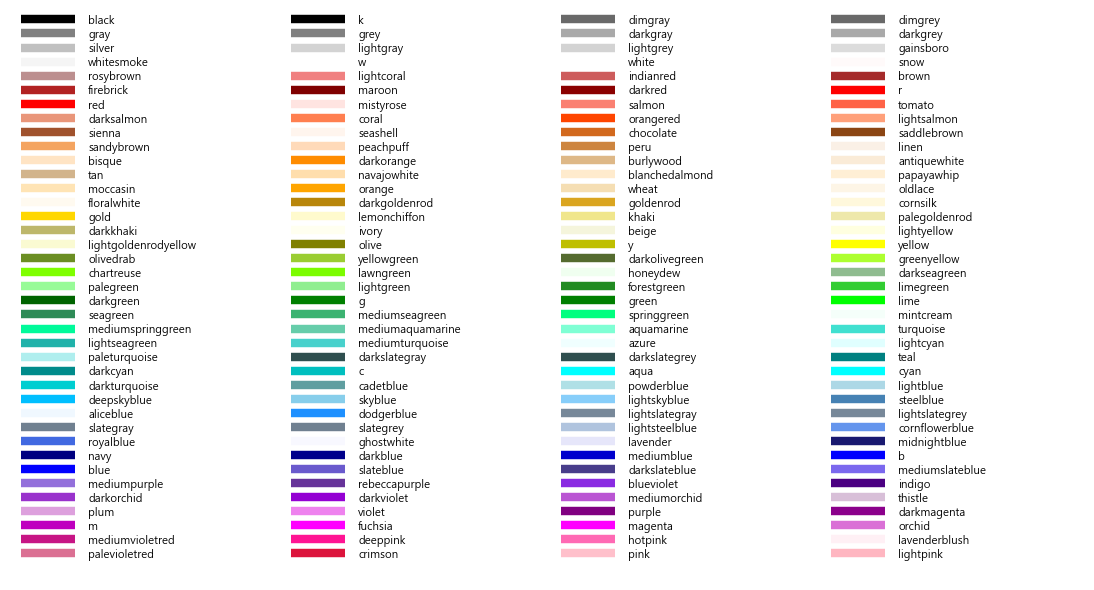

In [30]:
from __future__ import division
from matplotlib import colors as mcolors

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(15, 8))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=colors[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

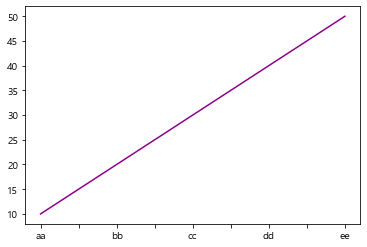

In [31]:
# Line(선) 그래프.
sr.plot(color='darkmagenta')
plt.show()

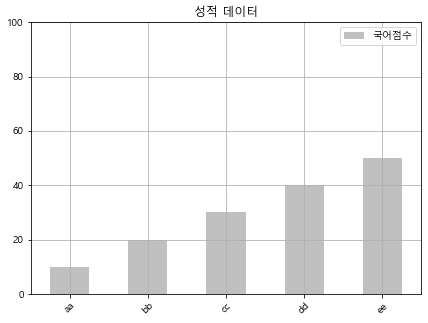

In [32]:
sr.plot(kind='bar', figsize=(7,5), title='성적 데이터', legend=True, grid=True, ylim=(0,100), rot=45, color='silver')
plt.show()

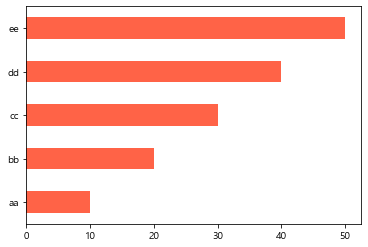

In [33]:
# kind : barh => 가로 막대그래프.
sr.plot(kind='barh', color='tomato')
plt.show()

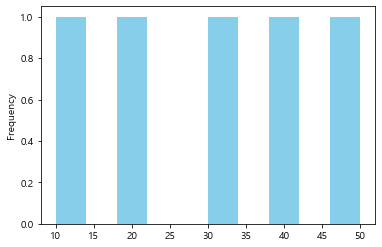

In [34]:
# 빈도를 보여주는 Histogram.
sr.plot(kind='hist', color='skyblue')
plt.show()

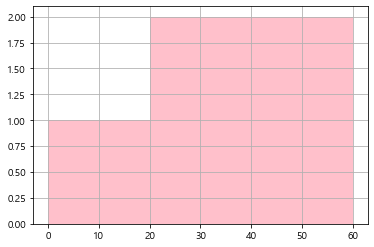

In [35]:
# 이같은 방식으로도 표현이 가능.
# bins : x축 범위 설정이 가능.
sr.hist(bins=[0, 20, 40, 60], color='pink')
plt.show()

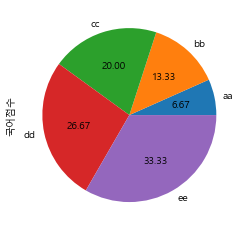

In [36]:
# Pie 차트 그래프. 
# autopct : 자동으로 비율을 표시해줌.
sr.plot(kind='pie', autopct='%.2f')
plt.show()

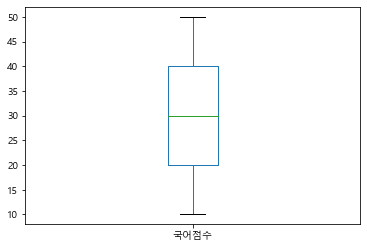

In [37]:
# Box-plot(상자 그림)을 표현.
sr.plot(kind='box')
plt.show()

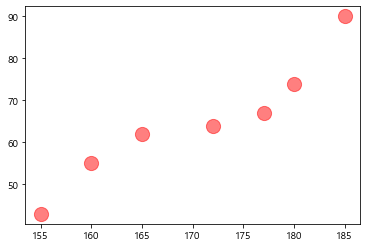

In [38]:
# 산점도(Scatter)
# plt.scatter()
height = [155,160,165,172,177,180,185]
weight = [43,55,62,64, 67,74,90]

plt.scatter( height, weight, s=200, c='r', alpha=0.5)
plt.show()

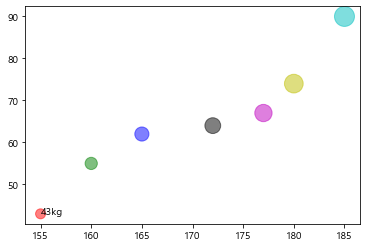

In [39]:
# 다양한 크기와 색깔로 표현이 가능.
# alpha : 투명도.
# c : 색상.
# s : 사이즈.
plt.scatter( height, weight,s=[100,150,200,250,300,350,400], 
            c=['r','g','b','k','m','y','c'], alpha=0.5)
plt.text(155, 43, '43kg')
plt.show()

#### 문제 1
- 키 , 몸무게, 표준체중(kg)=(신장(cm)-100)×0.85, 비만도(%)=현재체중/표준체중×100
- 비만도
    - ~ 90  : 저체중, (y,100)
    - 90 ~ 110 : 정상, (b ,150)
    - 110 ~ 120 : 과체중, (c, 200)
    - 120 ~ : 비만, (r ,300)
    
- 그래프각점에 비만도 결과값(저체중, 정상, 과체중, 비만)글자를 표시하고 원의 크기는 각 결과값에 따라 다른 크기로 그리시오.

In [46]:
# 차트 그리기
# 담을 리스트 만들기.
colorList=[]
sizeList=[]
textList=[]

# 비만도 함수 생성.
def obesity(h, w):
    
    # 표준체중.
    stdW = (h-100) * 0.85
    
    # 비만도 계산.
    fat   = w/stdW * 100
    color =''
    size  = 0
    text  = ''
    
    # 비만도에 따른 조건문 생성.
    if fat <=90:
        color = 'y'
        size = 100
        text = '저체중'
        
    elif fat<110:
        color = 'b'
        size= 150
        text = '정상'
        
    elif fat<120:
        color = 'c'
        size= 200
        text = '과체중'
        
    else:
        color = 'r'
        size= 300
        text = '비만'
    
    # 리스트로 추가.
    colorList.append(color)
    sizeList.append(size)
    textList.append(text)

# 키, 몸무게 데이터 비만도 함수에 적용.
for h, w in zip( height, weight):
    obesity( h, w )

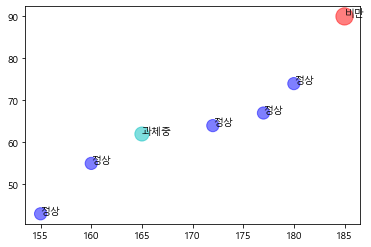

In [49]:
# 결과값 Scatter로 표현.
plt.scatter( height, weight, s=sizeList, c=colorList, alpha=0.5)
for h, w, t in zip( height, weight, textList):
    plt.text( h, w, t )
plt.show()